# Supervised discretization using Decision tree discretizer
Dataset: satimage
By: Sam & Malina
Update: 02/07/22

### About Dataset
NUMBER OF ATTRIBUTES: 36 (= 4 spectral bands x 9 pixels in neighbourhood) the pixels read out in sequence left-to-right and top-to-bottom. 

    - A1-A4: 4 top-left
    - A5-A8: 4 top middle
    - A9-A12: 4 top-right
    => central pixel are given by attributes 17,18,19 and 20

NUMBER OF EXAMPLES:

	- training set     4435
	- test set         2000
    
ATTRIBUTES: The attributes are numerical, in the range 0 to 255.
CLASS: 
	There are 6 decision classes: 1,2,3,4,5 and 7.

!!! NB. There are no examples with class 6 in this dataset-they have all been removed because of doubts about the 
	validity of this class.
    
!!! NB. DO NOT USE CROSS-VALIDATION WITH THIS DATASET !!!
- Just train and test only once with the above training and test sets.
- The data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset.

# 1. Data preparation

In [1]:
# Import library
import pandas as pd
import numpy as np
from collections import Counter #for Chi Merge
# Import library
import pandas as pd
import numpy as np
from collections import Counter #for Chi Merge
#for decision tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import DecisionTreeDiscretiser
plt.rcParams["figure.figsize"] = [15,5]
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Read data
data0_trn = pd.read_csv('sat_trn.csv', header=None, delim_whitespace=True) #training raw data
data0_tst = pd.read_csv('sat_tst.csv', header=None, delim_whitespace=True) #testing raw data

In [3]:
data0_trn.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [4]:
col0 = pd.read_csv('sat_col.csv', header=None, squeeze=True) #import column name

In [5]:
data0_trn.columns = col0 # change column name
data0_tst.columns = col0

In [6]:
data0_trn['class'] = pd.Categorical(data0_trn['class']) # convert class to categorical data
data0_tst['class'] = pd.Categorical(data0_tst['class'])

In [7]:
data0_trn.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [8]:
# Check number of unique values
data0_trn.select_dtypes(include=np.number).nunique()


0
A1      50
A2      81
A3      74
A4     101
A5      49
A6      81
A7      74
A8     100
A9      50
A10     80
A11     77
A12    102
A13     49
A14     82
A15     75
A16     98
A17     49
A18     79
A19     72
A20     99
A21     50
A22     79
A23     75
A24    101
A25     50
A26     82
A27     74
A28     97
A29     50
A30     80
A31     76
A32    101
A33     49
A34     79
A35     77
A36    104
dtype: int64

In [9]:
# Check number of unique values
data0_tst.select_dtypes(include=np.number).nunique()

0
A1     48
A2     78
A3     73
A4     96
A5     49
A6     75
A7     73
A8     96
A9     48
A10    73
A11    71
A12    94
A13    51
A14    76
A15    74
A16    96
A17    49
A18    76
A19    75
A20    97
A21    48
A22    73
A23    74
A24    95
A25    49
A26    74
A27    72
A28    96
A29    48
A30    76
A31    73
A32    94
A33    49
A34    75
A35    71
A36    92
dtype: int64

In [10]:
data0 = pd.concat([data0_trn, data0_tst])

In [11]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      6435 non-null   int64   
 1   A2      6435 non-null   int64   
 2   A3      6435 non-null   int64   
 3   A4      6435 non-null   int64   
 4   A5      6435 non-null   int64   
 5   A6      6435 non-null   int64   
 6   A7      6435 non-null   int64   
 7   A8      6435 non-null   int64   
 8   A9      6435 non-null   int64   
 9   A10     6435 non-null   int64   
 10  A11     6435 non-null   int64   
 11  A12     6435 non-null   int64   
 12  A13     6435 non-null   int64   
 13  A14     6435 non-null   int64   
 14  A15     6435 non-null   int64   
 15  A16     6435 non-null   int64   
 16  A17     6435 non-null   int64   
 17  A18     6435 non-null   int64   
 18  A19     6435 non-null   int64   
 19  A20     6435 non-null   int64   
 20  A21     6435 non-null   int64   
 21  A22     6435 n

In [12]:
data0_trn.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4
4434,71,91,100,81,76,95,108,88,80,95,...,85,70,91,104,85,63,91,100,81,4


In [13]:
data0.iloc[4435]==data0_tst.iloc[0] # Check: first item of tesing dataset in the merged dataset

0
A1       True
A2       True
A3       True
A4       True
A5       True
A6       True
A7       True
A8       True
A9       True
A10      True
A11      True
A12      True
A13      True
A14      True
A15      True
A16      True
A17      True
A18      True
A19      True
A20      True
A21      True
A22      True
A23      True
A24      True
A25      True
A26      True
A27      True
A28      True
A29      True
A30      True
A31      True
A32      True
A33      True
A34      True
A35      True
A36      True
class    True
Name: 0, dtype: bool

In [14]:
# Export this dataset for discretization
data0.to_csv('clean_satimage.csv',index=False)

In [15]:
satimage = data0
satimage

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,5


In [16]:
satimage = pd.DataFrame(satimage).astype(int)
satimage

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,1
1996,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,1
1997,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,5
1998,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,5


# 2. Decision Tree discretization

In [17]:
data = satimage
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [18]:
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            data,
            data['class'], test_size=0.3, random_state=0)

In [19]:
num_col = data.columns

## 2.1 debug version

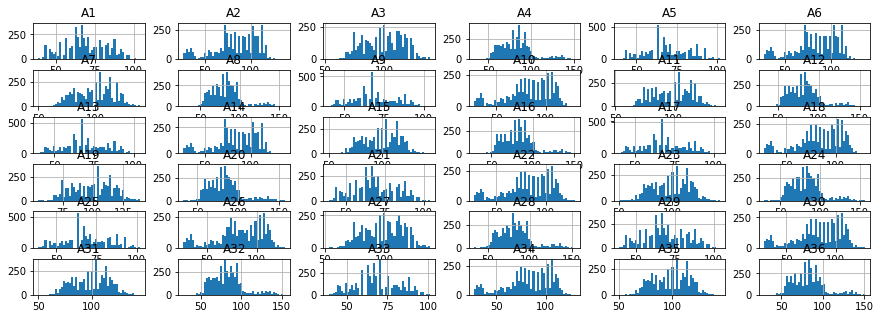

In [20]:
# we will discretise two continuous variables

X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36']].hist(bins=50)
plt.show()

In [21]:
'''
Parameters
----------

cv : int, default=3
    Desired number of cross-validation fold to be used to fit the decision
    tree.

scoring: str, default='neg_mean_squared_error'
    Desired metric to optimise the performance for the tree. Comes from
    sklearn metrics. See DecisionTreeRegressor or DecisionTreeClassifier
    model evaluation documentation for more options:
    https://scikit-learn.org/stable/modules/model_evaluation.html

variables : list
    The list of numerical variables that will be transformed. If None, the
    discretiser will automatically select all numerical type variables.

regression : boolean, default=True
    Indicates whether the discretiser should train a regression or a classification
    decision tree.

param_grid : dictionary, default=None
    The list of parameters over which the decision tree should be optimised
    during the grid search. The param_grid can contain any of the permitted
    parameters for Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier().

    If None, then param_grid = {'max_depth': [1, 2, 3, 4]}

random_state : int, default=None
    The random_state to initialise the training of the decision tree. It is one
    of the parameters of the Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier(). For reproducibility it is recommended to set
    the random_state to an integer.
'''
#For DT using regression
#treeDisc = DecisionTreeDiscretiser(cv=3,
 #                                  scoring='neg_mean_squared_error',
 #                                  variables=['recency', 'frequency', 'monetary', 'time'],
 #                                  regression=False,
 #                                  random_state=29)
#regression = True!

# the DecisionTreeDiscretiser needs the target for fitting
#treeDisc.fit(X_train, y_train)


treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [1, 2]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2]}, random_state=29,
                        regression=False, scoring='accuracy',
                        variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
                                   'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
                                   'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
                                   'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
                                   'A26', 'A27', 'A28', 'A29', 'A30', ...])

In [22]:
treeDisc.binner_dict_

{'A1': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A2': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A3': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A4': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A5': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A6': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]}, scoring='accuracy'),
 'A7': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2]},

In [23]:
# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

In [24]:
# here I put side by side the original variable and the transformed variable

tmp = pd.concat([X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class']],
                 train_t[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'class']]], axis=1)

tmp.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36',  'class', 'A1_binned', 'A2_binned', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36',  'class']

tmp.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
636,87,103,105,83,83,99,101,79,83,95,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.056471,0.044529,0.185002,0.032722,3
420,88,106,111,87,84,102,115,87,84,106,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.000000,0.001580,0.185002,0.032722,3
3605,50,66,86,76,53,66,82,76,60,73,...,0.036819,0.054920,0.043590,0.015717,0.026549,0.056471,0.044529,0.030952,0.032722,1
1857,67,99,113,96,67,91,104,92,59,75,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.006356,0.185002,0.032722,1
245,59,56,76,66,59,53,76,70,56,49,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7


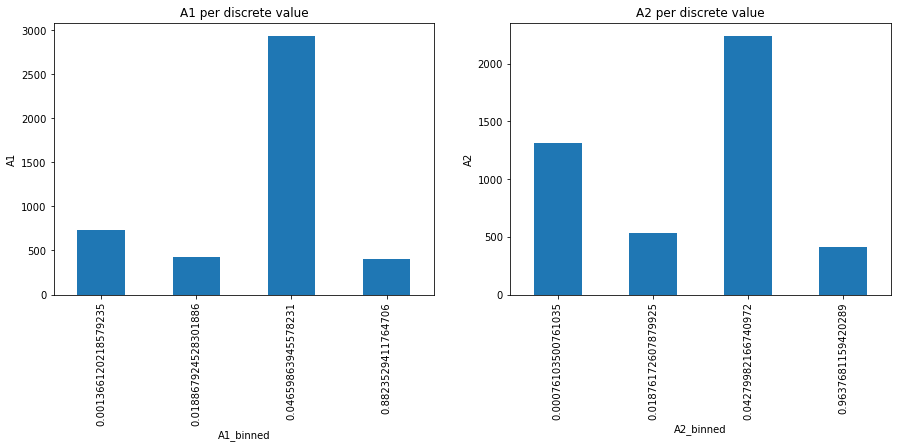

In [25]:
plt.subplot(1,2,1)

plt.subplot(1,2,1)
tmp.groupby('A1_binned')['A1'].count().plot.bar()
plt.ylabel('A1')
plt.title('A1 per discrete value')

plt.subplot(1,2,2)
tmp.groupby('A2_binned')['A2'].count().plot.bar()
plt.ylabel('A2')
plt.title('A2 per discrete value')

plt.show()

In [26]:
tmp2 = train_t
tmp2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A28,A29,A30,A31,A32,A33,A34,A35,A36,class
636,0.001366,0.000761,0.123300,0.036511,0.025397,0.021226,0.190582,0.039022,0.019231,0.024345,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.056471,0.044529,0.185002,0.032722,3
420,0.001366,0.000761,0.123300,0.036511,0.025397,0.002326,0.190582,0.039022,0.019231,0.008333,...,0.033581,0.003165,0.001572,0.193795,0.031321,0.000000,0.001580,0.185002,0.032722,3
3605,0.046599,0.042800,0.035587,0.036511,0.042373,0.036662,0.012898,0.039022,0.044430,0.032479,...,0.036819,0.054920,0.043590,0.015717,0.026549,0.056471,0.044529,0.030952,0.032722,1
1857,0.046599,0.018762,0.123300,0.036511,0.042373,0.036662,0.190582,0.039022,0.044430,0.032479,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.006356,0.185002,0.032722,1
245,0.046599,0.042800,0.015652,0.014333,0.042373,0.036662,0.012898,0.021930,0.044430,0.032479,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.046599,0.042800,0.015652,0.036511,0.042373,0.036662,0.012898,0.010181,0.044430,0.032479,...,0.955335,0.940510,0.975430,0.075601,0.031321,0.056471,0.044529,0.024715,0.029933,5
3264,0.046599,0.018762,0.123300,0.036511,0.042373,0.036662,0.190582,0.039022,0.044430,0.032479,...,0.033581,0.054920,0.010309,0.193795,0.031321,0.056471,0.044529,0.068323,0.032722,1
1653,0.046599,0.042800,0.015652,0.014333,0.042373,0.036662,0.012898,0.010181,0.044430,0.032479,...,0.011614,0.054920,0.043590,0.015717,0.018059,0.056471,0.044529,0.024715,0.029933,7
2607,0.046599,0.000761,0.334471,0.036511,0.042373,0.002326,0.190582,0.039022,0.044430,0.008333,...,0.033581,0.054920,0.001572,0.193795,0.031321,0.056471,0.001580,0.185002,0.032722,1


In [27]:
# Export this dataset after discretization
tmp2.to_csv('satimage_DT_discretized.csv',index=False)

In [28]:
data.dtypes

0
A1       int32
A2       int32
A3       int32
A4       int32
A5       int32
A6       int32
A7       int32
A8       int32
A9       int32
A10      int32
A11      int32
A12      int32
A13      int32
A14      int32
A15      int32
A16      int32
A17      int32
A18      int32
A19      int32
A20      int32
A21      int32
A22      int32
A23      int32
A24      int32
A25      int32
A26      int32
A27      int32
A28      int32
A29      int32
A30      int32
A31      int32
A32      int32
A33      int32
A34      int32
A35      int32
A36      int32
class    int32
dtype: object

## 2.2 DT with small max_depth

In [29]:
#make DT discreizer
# 'max_depth': [2] => 2^2 = 4 intervals max. 
import time
start = time.time() # For measuring time execution
treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [2]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

#add on to categorical dataset again
disc = pd.concat([train_t, test_t], axis=0)
print(disc)
#categorical = categorical.drop('label', axis=1)

print('DT discreizer binner dict:')
print(treeDisc.binner_dict_)
print(' ')
print('Computation time: ')
end = time.time()
print(end - start) # Total time execution for this sample

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001366  0.000761  0.123300  0.036511  0.025397  0.021226  0.190582   
420   0.001366  0.000761  0.123300  0.036511  0.025397  0.002326  0.190582   
3605  0.046599  0.042800  0.035587  0.036511  0.042373  0.036662  0.012898   
1857  0.046599  0.018762  0.123300  0.036511  0.042373  0.036662  0.190582   
245   0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
1284  0.018868  0.018762  0.123300  0.036511  0.042373  0.036662  0.074128   
658   0.882353  0.963768  0.334471  0.955224  0.903941  0.976019  0.190582   
1329  0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
4285  0.046599  0.018762  0.123300  0.036511  0.042373  0.002326  0.190582   

0           A8        A9       A10  ...       A28       A29    

In [30]:
#Show number of bins for each variable
#no of bins
for i in disc:
    print('No of bins: ' + i)
    print(disc[i].nunique())
    #show start of intervals of each bin
    print('Entries per interval for ' + i)
    print(Counter(disc[i]))
    print(' ')

No of bins: A1
4
Entries per interval for A1
Counter({0.04659863945578231: 4224, 0.001366120218579235: 1048, 0.018867924528301886: 617, 0.8823529411764706: 546})
 
No of bins: A2
4
Entries per interval for A2
Counter({0.04279982166740972: 3210, 0.00076103500761035: 1893, 0.01876172607879925: 773, 0.9637681159420289: 559})
 
No of bins: A3
4
Entries per interval for A3
Counter({0.12330009066183137: 3159, 0.01565217391304348: 1624, 0.03558718861209965: 829, 0.33447098976109213: 823})
 
No of bins: A4
4
Entries per interval for A4
Counter({0.036511156186612576: 3545, 0.014332965821389196: 1295, 0.026027397260273973: 1047, 0.9552238805970149: 548})
 
No of bins: A5
4
Entries per interval for A5
Counter({0.0423728813559322: 4408, 0.0013986013986013986: 1023, 0.9039408866995073: 555, 0.025396825396825397: 449})
 
No of bins: A6
4
Entries per interval for A6
Counter({0.03666245259165613: 3380, 0.002325581395348837: 1855, 0.02122641509433962: 629, 0.9760191846522782: 571})
 
No of bins: A7
4
E

In [31]:
#ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data1 = asarray(disc)
print(disc)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(disc))
#print(result)
disc_ord = pd.DataFrame(result).astype(int)
tmp_col = satimage.columns
disc_ord.columns = tmp_col # change column name
#print(disc_ord)
#disc_ord = pd.concat([categorical, disc_ord], axis=1)
print(disc_ord)
disc_ord.isna().sum()
# Export this dataset for discretization
disc_ord.to_csv('DT_small_discretized_satimage.csv',index=False)

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001366  0.000761  0.123300  0.036511  0.025397  0.021226  0.190582   
420   0.001366  0.000761  0.123300  0.036511  0.025397  0.002326  0.190582   
3605  0.046599  0.042800  0.035587  0.036511  0.042373  0.036662  0.012898   
1857  0.046599  0.018762  0.123300  0.036511  0.042373  0.036662  0.190582   
245   0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
1284  0.018868  0.018762  0.123300  0.036511  0.042373  0.036662  0.074128   
658   0.882353  0.963768  0.334471  0.955224  0.903941  0.976019  0.190582   
1329  0.046599  0.042800  0.015652  0.014333  0.042373  0.036662  0.012898   
4285  0.046599  0.018762  0.123300  0.036511  0.042373  0.002326  0.190582   

0           A8        A9       A10  ...       A28       A29    

## 2.3 DT with medium max_depth

In [32]:
#make DT discreizer
# 'max_depth': [3] => 2^3 = 8 intervals max. 
import time
start = time.time() # For measuring time execution
treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [3]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

#add on to categorical dataset again
disc = pd.concat([train_t, test_t], axis=0)
print(disc)
#categorical = categorical.drop('label', axis=1)

# put side by side the original variable and the transformed variable
print('DT discreizer binner dict:')
print(treeDisc.binner_dict_)
print(' ')
print('Computation time: ')
end = time.time()
print(end - start) # Total time execution for this sample

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001555  0.000794  0.136767  0.025551  0.013636  0.017361  0.140193   
420   0.001555  0.000794  0.136767  0.025551  0.013636  0.002441  0.140193   
3605  0.106959  0.027717  0.026042  0.025551  0.103321  0.023692  0.014071   
1857  0.024954  0.013652  0.136767  0.083156  0.020399  0.023692  0.140193   
245   0.106959  0.111663  0.017029  0.015116  0.103321  0.112392  0.014071   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.024954  0.027717  0.017029  0.015116  0.020399  0.023692  0.014071   
1284  0.016502  0.013652  0.079304  0.025551  0.020399  0.023692  0.058667   
658   0.940845  0.985955  0.280534  0.972900  0.969419  0.987080  0.332767   
1329  0.106959  0.111663  0.017029  0.015116  0.103321  0.112392  0.014071   
4285  0.106959  0.025000  0.136767  0.025551  0.020399  0.002441  0.140193   

0           A8        A9       A10  ...       A28       A29    

In [33]:
#Show number of bins for each variable
#no of bins
for i in disc:
    print('No of bins: ' + i)
    print(disc[i].nunique())
    #show start of intervals of each bin
    print('Entries per interval for ' + i)
    print(Counter(disc[i]))
    print(' ')

No of bins: A1
8
Entries per interval for A1
Counter({0.024953789279112754: 3071, 0.10695876288659793: 1153, 0.0015552099533437014: 934, 0.9408450704225352: 484, 0.0165016501650165: 461, 0.024793388429752067: 156, 0.0: 114, 0.49056603773584906: 62})
 
No of bins: A2
8
Entries per interval for A2
Counter({0.027717391304347826: 2621, 0.0007936507936507937: 1806, 0.11166253101736973: 589, 0.9859550561797753: 485, 0.013651877133105802: 424, 0.025: 349, 0.0: 87, 0.8275862068965517: 74})
 
No of bins: A3
8
Entries per interval for A3
Counter({0.13676731793960922: 2419, 0.017029328287606435: 1492, 0.07930367504835589: 740, 0.28053435114503816: 727, 0.04054054054054054: 557, 0.026041666666666668: 272, 0.0: 132, 0.7903225806451613: 96})
 
No of bins: A4
8
Entries per interval for A4
Counter({0.02555110220440882: 2862, 0.015116279069767442: 1221, 0.03180914512922465: 728, 0.08315565031982942: 683, 0.9728997289972899: 500, 0.013215859030837005: 319, 0.0: 74, 0.7575757575757576: 48})
 
No of bins:

In [34]:
#ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data1 = asarray(disc)
print(disc)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(disc))
#print(result)
disc_ord = pd.DataFrame(result).astype(int)
tmp_col = satimage.columns
disc_ord.columns = tmp_col # change column name
#print(disc_ord)
#disc_ord = pd.concat([categorical, disc_ord], axis=1)
print(disc_ord)
disc_ord.isna().sum()
# Export this dataset for discretization
disc_ord.to_csv('DT_medium_discretized_satimage.csv',index=False)

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001555  0.000794  0.136767  0.025551  0.013636  0.017361  0.140193   
420   0.001555  0.000794  0.136767  0.025551  0.013636  0.002441  0.140193   
3605  0.106959  0.027717  0.026042  0.025551  0.103321  0.023692  0.014071   
1857  0.024954  0.013652  0.136767  0.083156  0.020399  0.023692  0.140193   
245   0.106959  0.111663  0.017029  0.015116  0.103321  0.112392  0.014071   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.024954  0.027717  0.017029  0.015116  0.020399  0.023692  0.014071   
1284  0.016502  0.013652  0.079304  0.025551  0.020399  0.023692  0.058667   
658   0.940845  0.985955  0.280534  0.972900  0.969419  0.987080  0.332767   
1329  0.106959  0.111663  0.017029  0.015116  0.103321  0.112392  0.014071   
4285  0.106959  0.025000  0.136767  0.025551  0.020399  0.002441  0.140193   

0           A8        A9       A10  ...       A28       A29    

## 2.4 DT with large max_depth

In [35]:
#make DT discreizer
# 'max_depth': [4] => 2^4 = 16 intervals max. 
import time
start = time.time() # For measuring time execution
treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [4]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

#add on to categorical dataset again
disc = pd.concat([train_t, test_t], axis=0)
print(disc)
#categorical = categorical.drop('label', axis=1)

# put side by side the original variable and the transformed variable
print('DT discreizer binner dict:')
print(treeDisc.binner_dict_)
print(' ')
print('Computation time: ')
end = time.time()
print(end - start) # Total time execution for this sample

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001838  0.001460  0.132530  0.023210  0.019231  0.006410  0.138752   
420   0.001838  0.001460  0.132530  0.023210  0.011905  0.004386  0.144144   
3605  0.342857  0.026676  0.014388  0.032787  0.196552  0.024920  0.013921   
1857  0.021601  0.008000  0.144262  0.060606  0.021446  0.021739  0.138752   
245   0.070045  0.116564  0.011852  0.015495  0.051625  0.080808  0.014173   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.021601  0.026676  0.011852  0.015495  0.021446  0.024920  0.013921   
1284  0.011364  0.046512  0.090615  0.023210  0.017657  0.021739  0.086093   
658   0.975439  0.949153  0.425532  0.986577  0.929078  0.996599  0.260521   
1329  0.070045  0.116564  0.011852  0.000000  0.051625  0.300000  0.014173   
4285  0.070045  0.019608  0.132530  0.023210  0.021446  0.004386  0.144144   

0           A8        A9       A10  ...       A28       A29    

In [36]:
#Show number of bins for each variable
#no of bins
for i in disc:
    print('No of bins: ' + i)
    print(disc[i].nunique())
    #show start of intervals of each bin
    print('Entries per interval for ' + i)
    print(Counter(disc[i]))
    print(' ')

No of bins: A1
12
Entries per interval for A1
Counter({0.021601016518424398: 2245, 0.07004470938897168: 994, 0.03389830508474576: 826, 0.001838235294117647: 802, 0.9754385964912281: 385, 0.018604651162790697: 323, 0.0: 246, 0.34285714285714286: 159, 0.024793388429752067: 156, 0.011363636363636364: 138, 0.8: 99, 0.49056603773584906: 62})
 
No of bins: A2
14
Entries per interval for A2
Counter({0.026676279740447006: 1963, 0.00145985401459854: 998, 0.0: 895, 0.03090507726269316: 658, 0.1165644171779141: 488, 0.9932659932659933: 398, 0.008: 356, 0.026455026455026454: 272, 0.09090909090909091: 101, 0.9491525423728814: 87, 0.0196078431372549: 77, 0.8545454545454545: 71, 0.046511627906976744: 68, 0.3333333333333333: 3})
 
No of bins: A3
15
Entries per interval for A3
Counter({0.13253012048192772: 1555, 0.011851851851851851: 951, 0.14426229508196722: 864, 0.02617801047120419: 541, 0.19940476190476192: 471, 0.09061488673139159: 440, 0.03619909502262444: 328, 0.0625: 300, 0.425531914893617: 256,

In [37]:
intervals = pd.DataFrame(columns = ['intervals'])
for i in disc: 
    k= disc[i].nunique()
    intervals.loc[len(intervals)] = k
intervals.to_csv('intervals_satimage_DT_large.csv',index=False)

In [38]:
#ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data1 = asarray(disc)
print(disc)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(disc))
#print(result)
disc_ord = pd.DataFrame(result).astype(int)
tmp_col = satimage.columns
disc_ord.columns = tmp_col # change column name
#print(disc_ord)
#disc_ord = pd.concat([categorical, disc_ord], axis=1)
print(disc_ord)
disc_ord.isna().sum()
# Export this dataset for discretization
disc_ord.to_csv('DT_large_discretized_satimage.csv',index=False)

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001838  0.001460  0.132530  0.023210  0.019231  0.006410  0.138752   
420   0.001838  0.001460  0.132530  0.023210  0.011905  0.004386  0.144144   
3605  0.342857  0.026676  0.014388  0.032787  0.196552  0.024920  0.013921   
1857  0.021601  0.008000  0.144262  0.060606  0.021446  0.021739  0.138752   
245   0.070045  0.116564  0.011852  0.015495  0.051625  0.080808  0.014173   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.021601  0.026676  0.011852  0.015495  0.021446  0.024920  0.013921   
1284  0.011364  0.046512  0.090615  0.023210  0.017657  0.021739  0.086093   
658   0.975439  0.949153  0.425532  0.986577  0.929078  0.996599  0.260521   
1329  0.070045  0.116564  0.011852  0.000000  0.051625  0.300000  0.014173   
4285  0.070045  0.019608  0.132530  0.023210  0.021446  0.004386  0.144144   

0           A8        A9       A10  ...       A28       A29    

## 2.4 DT with extra large max_depth

In [39]:
#make DT discreizer
# 'max_depth': [5] => 2^5 = 32 intervals max. 
import time
start = time.time() # For measuring time execution
treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36'],
                                   regression=False,
                                   param_grid={'max_depth': [5]},
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

#add on to categorical dataset again
disc = pd.concat([train_t, test_t], axis=0)
print(disc)
#categorical = categorical.drop('label', axis=1)

# put side by side the original variable and the transformed variable
print('DT discreizer binner dict:')
print(treeDisc.binner_dict_)
print(' ')
print('Computation time: ')
end = time.time()
print(end - start) # Total time execution for this sample

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001898  0.001587  0.116992  0.024639  0.019231  0.006410  0.157609   
420   0.001898  0.001587  0.116992  0.024639  0.011905  0.004747  0.171004   
3605  0.347222  0.028222  0.022989  0.016598  0.126374  0.043103  0.012121   
1857  0.012128  0.012048  0.114198  0.025641  0.022041  0.025045  0.157609   
245   0.032653  0.087591  0.007828  0.026549  0.044118  0.083700  0.013359   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.012128  0.028222  0.007828  0.026549  0.022041  0.023050  0.012121   
1284  0.011364  0.046512  0.093750  0.024639  0.016706  0.025045  0.086093   
658   0.952381  0.956522  0.448718  0.972973  0.950495  1.000000  0.406452   
1329  0.091549  0.269231  0.024390  0.000000  0.059761  0.317073  0.018018   
4285  0.032653  0.019608  0.116992  0.024639  0.022041  0.004747  0.102857   

0           A8        A9       A10  ...       A28       A29    

In [40]:
#Show number of bins for each variable
#no of bins
for i in disc:
    print('No of bins: ' + i)
    print(disc[i].nunique())
    #show start of intervals of each bin
    print('Entries per interval for ' + i)
    print(Counter(disc[i]))
    print(' ')

No of bins: A1
18
Entries per interval for A1
Counter({0.012127894156560088: 1324, 0.034482758620689655: 921, 0.0018975332068311196: 779, 0.09154929577464789: 622, 0.02564102564102564: 434, 0.04316546762589928: 392, 0.0326530612244898: 372, 0.0: 269, 0.012195121951219513: 250, 0.9888888888888889: 247, 0.024793388429752067: 156, 0.9523809523809523: 138, 0.011363636363636364: 138, 0.3472222222222222: 114, 0.8: 99, 0.0392156862745098: 73, 0.49056603773584906: 62, 0.3333333333333333: 45})
 
No of bins: A2
21
Entries per interval for A2
Counter({0.028222013170272814: 1522, 0.0: 1145, 0.0015873015873015873: 915, 0.021604938271604937: 441, 0.08759124087591241: 413, 0.027777777777777776: 378, 0.03482587064676617: 280, 0.012048192771084338: 222, 1.0: 219, 0.022388059701492536: 200, 0.9854014598540146: 179, 0.0196078431372549: 77, 0.2692307692307692: 75, 0.03636363636363636: 72, 0.9565217391304348: 69, 0.1346153846153846: 68, 0.046511627906976744: 68, 0.8: 40, 0.92: 31, 0.9230769230769231: 18, 0

In [41]:
intervals = pd.DataFrame(columns = ['intervals'])
for i in disc: 
    k= disc[i].nunique()
    intervals.loc[len(intervals)] = k
intervals.to_csv('intervals_satimage_DT_extralarge.csv',index=False)

In [42]:
#ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data1 = asarray(disc)
print(disc)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = pd.DataFrame(encoder.fit_transform(disc))
#print(result)
disc_ord = pd.DataFrame(result).astype(int)
tmp_col = satimage.columns
disc_ord.columns = tmp_col # change column name
#print(disc_ord)
#disc_ord = pd.concat([categorical, disc_ord], axis=1)
print(disc_ord)
disc_ord.isna().sum()
# Export this dataset for discretization
disc_ord.to_csv('DT_verylarge_discretized_satimage.csv',index=False)

0           A1        A2        A3        A4        A5        A6        A7  \
636   0.001898  0.001587  0.116992  0.024639  0.019231  0.006410  0.157609   
420   0.001898  0.001587  0.116992  0.024639  0.011905  0.004747  0.171004   
3605  0.347222  0.028222  0.022989  0.016598  0.126374  0.043103  0.012121   
1857  0.012128  0.012048  0.114198  0.025641  0.022041  0.025045  0.157609   
245   0.032653  0.087591  0.007828  0.026549  0.044118  0.083700  0.013359   
...        ...       ...       ...       ...       ...       ...       ...   
2265  0.012128  0.028222  0.007828  0.026549  0.022041  0.023050  0.012121   
1284  0.011364  0.046512  0.093750  0.024639  0.016706  0.025045  0.086093   
658   0.952381  0.956522  0.448718  0.972973  0.950495  1.000000  0.406452   
1329  0.091549  0.269231  0.024390  0.000000  0.059761  0.317073  0.018018   
4285  0.032653  0.019608  0.116992  0.024639  0.022041  0.004747  0.102857   

0           A8        A9       A10  ...       A28       A29    